## Language Processing
Examine Properties of individual books
    - book lenth
    - number of unique words
    - how attributes cluster by language or authorship

<b> Project Gutenberg </b> - oldest digital library of books with over 50,000 books
are in a public domain - can be downloaded and read for free

In [1]:
text = "This is a sentence. First words of sentences start with a capital letter and end with a period, question mark, or exclamation in the English language."

In [2]:
def count_words(text):
    """
    count the number of times each word occurs in text.
    Returns dictionary key = words and values = word count_words
    """
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

print (count_words(text))

{'and': 1, 'words': 1, 'is': 1, 'sentences': 1, 'in': 1, 'exclamation': 1, 'end': 1, 'question': 1, 'start': 1, 'capital': 1, 'sentence.': 1, 'This': 1, 'period,': 1, 'letter': 1, 'English': 1, 'with': 2, 'First': 1, 'a': 3, 'mark,': 1, 'of': 1, 'language.': 1, 'the': 1, 'or': 1}


Periods and puncuations are counted as words along with mixed case words"
Can address mixed case words my making the string all lowercase.
Addressing punctuaction - specify all the punctuations to skip then loop over that container
and replace every occurrence of a punctuaction with an empty string

In [3]:
def count_words2(text):
    """
    count the number of times each word occurs in text.
    Returns dictionary key = words and values = word count_words
    accounts for mixed case words and punctuaction
    """
    text = text.lower()
    skips = [".", ",", ":", ";", "?", "!", '""', "''" ]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

print (count_words2(text))


{'and': 1, 'words': 1, 'sentence': 1, 'is': 1, 'sentences': 1, 'period': 1, 'in': 1, 'exclamation': 1, 'end': 1, 'question': 1, 'mark': 1, 'start': 1, 'capital': 1, 'letter': 1, 'with': 2, 'a': 3, 'language': 1, 'this': 1, 'of': 1, 'english': 1, 'the': 1, 'or': 1, 'first': 1}


Python provides a counter tool from the Collections module"

In [4]:
from collections import Counter
def count_words_faster(text):
    text = text.lower()
    skips = [".", ",", ":", ";", "?", "!", '""', "''" ]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

print (count_words_faster(text))

print (count_words2(text) == count_words_faster(text))

print (len(count_words2("This comprehension check is to check for comprehension.")))

print (count_words2(text) is count_words_faster(text))

Counter({'a': 3, 'with': 2, 'and': 1, 'words': 1, 'sentence': 1, 'is': 1, 'sentences': 1, 'period': 1, 'in': 1, 'exclamation': 1, 'end': 1, 'question': 1, 'mark': 1, 'start': 1, 'capital': 1, 'letter': 1, 'language': 1, 'this': 1, 'of': 1, 'english': 1, 'the': 1, 'or': 1, 'first': 1})
True
6
False


### Reading in a Book
Character encoding = how a computer reads characters
UTF-8 dominant encoding

In [5]:
from io import open

In [6]:
def read_book(title_path):
    """
    Read a book and return it as a string
    """
    with open(title_path, "r", encoding="utf-8") as current_file:
        text = current_file.read()
        text.replace("\n", "").replace("\r","")
    return text

In [7]:
text_book = read_book("Books/English/shakespeare/Romeo and Juliet.txt")

print ("Number of characters in Romeo and Juliet:",len(text_book))

('Number of characters in Romeo and Juliet:', 174128)


In [8]:
ind = text_book.find("What's in a name?")
print (ind)

sample_text = text_book[ind:ind + 1000]
print (sample_text)

44114
What's in a name? That which we call a rose
    By any other name would smell as sweet.
    So Romeo would, were he not Romeo call'd,
    Retain that dear perfection which he owes
    Without that title. Romeo, doff thy name;
    And for that name, which is no part of thee,
    Take all myself.

  Rom. I take thee at thy word.
    Call me but love, and I'll be new baptiz'd;
    Henceforth I never will be Romeo.

  Jul. What man art thou that, thus bescreen'd in night,
    So stumblest on my counsel?

  Rom. By a name
    I know not how to tell thee who I am.
    My name, dear saint, is hateful to myself,
    Because it is an enemy to thee.
    Had I it written, I would tear the word.

  Jul. My ears have yet not drunk a hundred words
    Of that tongue's utterance, yet I know the sound.
    Art thou not Romeo, and a Montague?

  Rom. Neither, fair saint, if either thee dislike.

  Jul. How cam'st thou hither, tell me, and wherefore?
    The orchard walls are high and hard to clim

### Computing Word Frequency Statistics
how many unique words and frequency in a given book

In [9]:
def count_words_faster(text):
    text = text.lower()
    skips = [".", ",", ":", ";", "?", "!", '""', "''" ]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    """return number of unique words and frequencies"""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

word_counts = count_words_faster(text_book)
(num_unique, counts) = word_stats(word_counts)

print ("Number of words in Romeo and Juliet:",(num_unique))
print ("Number of unique words in Romeo and Juliet:", sum(counts))

('Number of words in Romeo and Juliet:', 5926)
('Number of unique words in Romeo and Juliet:', 40776)


In [10]:
text_book_German = read_book("./Books/German/shakespeare/Romeo und Julia.txt")
print ("Number of characters in Romeo und Julia:",len(text_book_German))

('Number of characters in Romeo und Julia:', 142630)


In [11]:
def word_stats(word_counts):
    """return number of unique words and frequencies"""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

word_counts = count_words_faster(text_book_German)
(num_unique, counts) = word_stats(word_counts)

print ("Number of words in Romeo und Julia:",num_unique)
print ("Number of unique words in Romeo und Julia:", sum(counts))

('Number of words in Romeo und Julia:', 7407)
('Number of unique words in Romeo und Julia:', 20311)


### Reading Multiple Files
read every book in the various subdirectories of the Books folder <br/>
`import os`

In [20]:
!python -V

Python 3.6.1 :: Continuum Analytics, Inc.


In [12]:
import os

In [15]:
book_dir = "./Books"
os.listdir(book_dir)

['English', 'French', 'German', 'Portuguese']

In [24]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            #print inputfile
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            # takes text - feeds into count_words function
            # returns an object that gets pushed into the words text function
            # which returns as an object thats returned as a tuple
            # unpacking a tuple

### Pandas


In [25]:
import pandas as pd

In [26]:
table = pd.DataFrame(columns = ("name", "age"))
table.loc[1] = "Amber" , 30
table.loc[2] = "Kumani", 6
print (table.columns)
table

Index([u'name', u'age'], dtype='object')


,name,age
1,Amber,30
2,Kumani,6


In [27]:
def count_words_faster(text):
    text = text.lower()
    skips = [".", ",", ":", ";", "?", "!", '""', "''" ]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    """return number of unique words and frequencies"""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            # print (inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words_faster(text))
            stats.loc[title_num] = language, author, title, sum(counts), num_unique
            title_num += 1
stats    

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4602
2,English,shakespeare,Hamlet.txt,28551,7236
3,English,shakespeare,Macbeth.txt,16874,5109
4,English,shakespeare,Othello.txt,26590,6350
5,English,shakespeare,Richard III.txt,48315,6220
6,English,shakespeare,Romeo and Juliet.txt,40776,5926
7,English,shakespeare,The Merchant of Venice.txt,20949,5292
8,French,chevalier,L'a�le de sable.txt,73801,18689
9,French,chevalier,L'enfer et le paradis de l'autre monde.txt,40827,10545
10,French,chevalier,La capitaine.txt,46306,12949


In [28]:
def count_words_faster(text):
    text = text.lower()
    skips = [".", ",", ":", ";", "?", "!", '""', "''" ]
    for ch in skips:
        text = text.replace(ch, "")
        word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    """return number of unique words and frequencies"""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            # print (inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            # modifications capitalize first letter in title and remove .txt extension
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1
stats

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4833
2,English,Shakespeare,Hamlet,28551,7761
3,English,Shakespeare,Macbeth,16874,5463
4,English,Shakespeare,Othello,26590,6768
5,English,Shakespeare,Richard III,48315,8908
6,English,Shakespeare,Romeo and Juliet,40776,8258
7,English,Shakespeare,The Merchant of Venice,20949,5513
8,French,Chevalier,L'a�le de sable,73801,22571
9,French,Chevalier,L'enfer et le paradis de l'autre monde,40827,12887
10,French,Chevalier,La capitaine,46306,15424


### Plotting Book Statistics

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

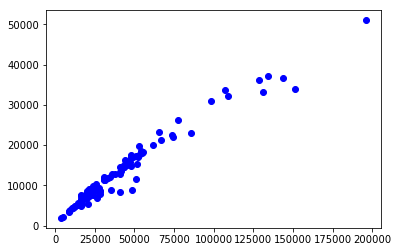

In [30]:
plt.plot(stats.length, stats.unique, "bo")

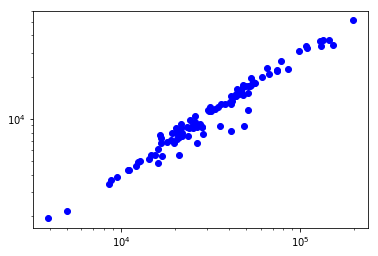

In [31]:
plt.loglog(stats.length, stats.unique, "bo")

In [32]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4833
2,English,Shakespeare,Hamlet,28551,7761
3,English,Shakespeare,Macbeth,16874,5463
4,English,Shakespeare,Othello,26590,6768
5,English,Shakespeare,Richard III,48315,8908
6,English,Shakespeare,Romeo and Juliet,40776,8258
7,English,Shakespeare,The Merchant of Venice,20949,5513


In [33]:
stats[stats.language == "French"].count()

language    32
author      32
title       32
length      32
unique      32
dtype: int64

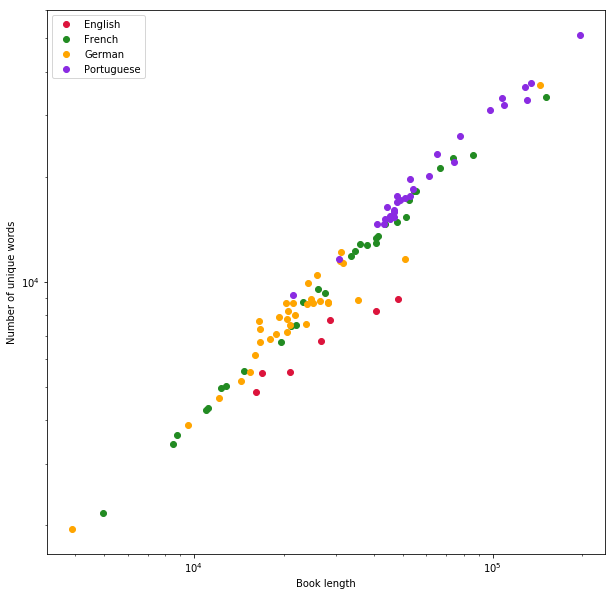

In [34]:
plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")
plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.show()

### Unique word count distribution

In [49]:
# The whole thing

from io import open
def read_book(title_path):
    """
    Read a book and return it as a string
    """
    with open(title_path, "r", encoding="utf-8") as current_file:
        text = current_file.read()
        text.replace("\n", "").replace("\r","")
    return text

#text_book = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")

#print ("Number of characters in Romeo and Juliet:",len(text_book))

from collections import Counter
def count_words_faster(text):
    text = text.lower()
    skips = [".", ",", ":", ";", "?", "!", '""', "'", '\n', "-", "(", ")", "[", "]"]
    for ch in skips:
        text = text.replace(ch, "")
        word_counts = Counter(text.split(" "))
    return word_counts

#print len(count_words_faster(text_book))

def word_stats(word_counts):
    """return number of unique words and frequencies"""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

word_counts = count_words_faster(text_book)
(num_unique, counts) = word_stats(word_counts)

#print ("Number of words in Romeo and Juliet:",(num_unique))
#print ("Number of unique words in Romeo and Juliet:", sum(counts))


def word_count_distribution(text):
    dict_words = (count_words_faster(text))
    distribution = dict(Counter(dict_words.values()))
    return distribution

"""text book"""
distribution = word_count_distribution(text)

import numpy as np
def more_frequent(distribution):
    counts = list(distribution.keys())
    frequency_of_counts = list(distribution.values())
    #print "counts", (counts)
    #print "frequency",(frequency_of_counts)
    cumulative = np.cumsum(frequency_of_counts)
    #print "cumulative",cumulative
    more_frequent = (1.0 - cumulative) / cumulative[-1]
    #print "more frequent",more_frequent
    return dict(zip(counts, more_frequent))

# print more_frequent(distribution)

In [56]:
hamlets = pd.DataFrame(columns = ("language", "distributionA"))
book_dir = "./Books"
os.listdir(book_dir)
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            #print (title)
            if title == "Hamlet.txt":
                inputfile = book_dir + "/" + language + "/" + author + "/" + title
                print (inputfile)
                text = read_book(inputfile)
                distributionA = word_count_distribution(text)
                hamlets.loc[title_num] = language, distributionA
                title_num += 1
hamlets

./Books/English/shakespeare/Hamlet.txt
./Books/German/shakespeare/Hamlet.txt
./Books/Portuguese/shakespeare/Hamlet.txt


,language,distributionA
1,English,"{1: 5180, 2: 647, 3: 250, 4: 146, 5: 92, 6: 56..."
2,German,"{1: 7253, 2: 869, 3: 355, 4: 191, 5: 127, 6: 9..."
3,Portuguese,"{1: 7134, 2: 967, 3: 403, 4: 203, 5: 131, 6: 7..."


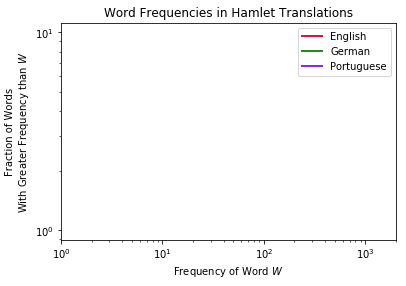

{1: 7134, 2: 967, 3: 403, 4: 203, 5: 131, 6: 76, 7: 63, 8: 50, 9: 33, 10: 25, 11: 36, 12: 22, 13: 18, 14: 20, 15: 12, 16: 14, 17: 7, 18: 8, 19: 10, 20: 12, 21: 4, 22: 3, 23: 6, 24: 5, 25: 5, 26: 5, 27: 3, 28: 4, 29: 4, 31: 2, 32: 5, 34: 7, 35: 4, 36: 3, 37: 3, 38: 7, 39: 4, 42: 2, 1067: 1, 45: 4, 46: 1, 47: 2, 48: 2, 49: 3, 50: 1, 51: 2, 52: 1, 53: 1, 54: 4, 55: 1, 56: 2, 58: 1, 60: 4, 61: 1, 62: 1, 63: 2, 64: 1, 65: 1, 67: 1, 74: 1, 75: 1, 79: 1, 341: 1, 43: 1, 89: 1, 271: 1, 97: 1, 101: 1, 879: 1, 112: 1, 115: 1, 118: 1, 125: 1, 127: 1, 130: 1, 133: 1, 135: 1, 138: 1, 141: 1, 146: 1, 149: 1, 665: 1, 154: 1, 157: 1, 159: 1, 186: 1, 330: 1, 194: 1, 710: 1, 200: 1, 305: 1, 213: 1, 985: 1, 237: 1, 272: 1, 248: 1, 765: 1}
{1: -0.75923363491218732, 2: -0.86216072378924957, 3: -0.90505588078765298, 4: -0.92666311868014906, 5: -0.94060670569451832, 6: -0.94869611495476314, 7: -0.95540180947312403, 8: -0.96072378924960089, 9: -0.9642362959020756, 10: -0.96689728579031398, 11: -0.9707291112293

In [57]:
colors = ["crimson", "forestgreen", "blueviolet"]
handles, hamlet_languages = [], []
for index in range(hamlets.shape[0]):
    language, distributionA = hamlets.language[index+1], hamlets.distributionA[index+1]
    dist = more_frequent(distributionA)
    plot, = plt.loglog(sorted(list(dist.keys())),sorted(list(dist.values()),
        reverse = True), color = colors[index], linewidth = 2)
    handles.append(plot)
    hamlet_languages.append(language)
plt.title("Word Frequencies in Hamlet Translations")
xlim    = [0, 2e3]
xlabel  = "Frequency of Word $W$"
ylabel  = "Fraction of Words\nWith Greater Frequency than $W$"
plt.xlim(xlim); plt.xlabel(xlabel); plt.ylabel(ylabel)
plt.legend(handles, hamlet_languages, loc = "upper right", numpoints = 1)

plt.show()
print (distributionA)
print (dist)